In [45]:
# creo un data set  fictisio para  poder  hacer  pruebas
#%%
import pandas as pd
import random
ciudades_ecuador = {
                                'Quito': 'Sierra',
                                'Guayaquil': 'Costa',
                                'Cuenca': 'Sierra',
                                'Ambato': 'Sierra',
                                'Manta': 'Costa',
                                'Esmeraldas': 'Costa',
                                'Ibarra': 'Sierra',
                                'Loja': 'Sierra',
                                'Portoviejo': 'Costa',
                                'Riobamba': 'Sierra',
                                'Salinas': 'Costa',
                                'Santa Elena': 'Costa',
                                'Tena': 'Oriente',
                                'Machala': 'Costa',
                                'Playas': 'Costa',
                                'Babahoyo': 'Costa',
                                'Machachi': 'Sierra',
                                'Latacunga': 'Sierra',
                                'Puyo': 'Oriente',
                                'Zamora': 'Oriente',
                                'Coca': 'Oriente',
                                'Puerto Francisco de Orellana': 'Oriente',
                                'Macas': 'Oriente',
                                'Tulcan': 'Sierra',
                                'Santo Domingo de los Tsachilas': 'Costa',
                                'Guaranda': 'Sierra',
                                'Azogues': 'Sierra',
                                'Chone': 'Costa',
                                'La Libertad': 'Costa',
                                'Pasaje': 'Costa',
                                'Samborondon': 'Costa',
                                'Milagro': 'Costa',
                                'Vinces': 'Costa',
                                'Jipijapa': 'Costa',
                                'Santa Rosa': 'Costa',
                                'San Gabriel': 'Sierra',
                                'Nueva Loja': 'Oriente',
                                'Puerto Ayora': 'Galapagos',
                                'Puerto Villamil': 'Galapagos',
                                'Baños de Agua Santa': 'Sierra',
                                
                            }
        
#%%
def generar_datos_aleatorios(num_filas):
    edades = [random.randint(10, 70) for _ in range(num_filas)]
    generos = [random.choice(['Man', 'Woman']) for _ in range(num_filas)]
    razas = [random.choice(['asian', 'indian', 'black', 'white', 'middle eastern', 'latino hispanic']) for _ in range(num_filas)]
    Meses = [random.choice(['Enero', 'Febrero', 'Marzo', 'Abril', 'Mayo', 'Junio', 'Julio', 'Agosto', 'Septiembre', 'Octubre', 'Noviembre', 'Diciembre']) for _ in range(num_filas)]
    horas = [random.randint(8, 22) for _ in range(num_filas)]
    ciudades = [    'Quito',
                        'Guayaquil',
                        'Cuenca',
                        'Ambato',
                        'Manta',
                        'Esmeraldas',
                        'Ibarra',
                        'Loja',
                        'Portoviejo',
                        'Riobamba',
                        'Salinas',
                        'Santa Elena',
                        'Tena',
                        'Machala',
                        'Playas',
                        'Babahoyo',
                        'Machachi',
                        'Latacunga',
                        'Puyo',
                        'Zamora',
                        'Coca',
                        'Puerto Francisco de Orellana',
                        'Macas',
                        'Tulcan',
                        'Santo Domingo de los Tsachilas',
                        'Guaranda',
                        'Azogues',
                        'Chone',
                        'La Libertad',
                        'Pasaje',
                        'Samborondon',
                        'Milagro',
                        'Vinces',
                        'Jipijapa',
                        'Santa Rosa',
                        'San Gabriel',
                        'Nueva Loja',
                        'Puerto Ayora',
                        'Puerto Villamil',
                        'Baños de Agua Santa']
    estaciones = [random.choice(['Invierno', 'Verano']) for _ in range(num_filas)]
    dias_festivos = [random.choice([True, False]) for _ in range(num_filas)]
    tipos_refresco = ['Coca-Cola', 'Pepsi', 'Fanta', 'Sprite', '7-Up', 'Guarana', 'Cola Tropical', 'gallito', 'Big Cola', 'Agua mineral']
    bebidas_alcoholicas =['Pilsener', 'Club', 'Cristal', 'Guayacán', 'Zhumir', 'Canelazo', 'Ron Abuelo', 'Ron Santa Fe', 'Old Parr', 'Aguardiente Cristal', 'Switch']
    datos = {'Edad': edades, 'Genero': generos, 'Rasgos': razas,'Mes':Meses, 'Hora': horas, 'Ciudad': [random.choice(ciudades) for _ in range(num_filas)],
             'Estacion': estaciones, 'Dia_Festivo': dias_festivos}
   
    tipos_refresco_nuevos = []
    for i in range(num_filas):
        if edades[i] > 18:
            probabilidad_bebida_alcoholica = 0.3
            if dias_festivos[i]:
                probabilidad_bebida_alcoholica = 0.9
            if random.random() < probabilidad_bebida_alcoholica:
                tipos_refresco_nuevos.append(random.choice(bebidas_alcoholicas))
            else:
                tipos_refresco_nuevos.append(random.choice(tipos_refresco))
        else:
            tipos_refresco_nuevos.append(random.choice(tipos_refresco))
    

    datos['Tipo de Refresco'] = tipos_refresco_nuevos
    datos['Region'] = [ciudades_ecuador[ciudad] for ciudad in datos['Ciudad']]
    return pd.DataFrame(datos)

#%%

#datos_aleatorios = generar_datos_aleatorios(17000000)
# %%
#datos_aleatorios.to_csv('datos_aleatorios.csv', index=False)
# %%
#datos_aleatorioss = generar_datos_aleatorios(28000)
#datos_aleatorioss.to_csv('/content/Datos_cosumo.csv', index=False)
# %%
datos_aleatorioss_prueba = generar_datos_aleatorios(4)
datos_aleatorioss_prueba.to_csv('/content/Datos_cosumo_p.csv', index=False)

#Datos: Carga Y Analisis 

In [26]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
import pickle
# Cargar los datos
df = pd.read_csv('/content/Datos_cosumo.csv')
le_genero = LabelEncoder()
le_rasgos = LabelEncoder()
le_mes = LabelEncoder()
le_ciudad = LabelEncoder()
le_estacion = LabelEncoder()
le_dia_festivo = LabelEncoder()
le_region = LabelEncoder()
le_refresco = LabelEncoder()

df["Genero"] = le_genero.fit_transform(df["Genero"])
df["Rasgos"] = le_rasgos.fit_transform(df["Rasgos"])
df["Mes"] = le_mes.fit_transform(df["Mes"])
df["Ciudad"] = le_ciudad.fit_transform(df["Ciudad"])
df["Estacion"] = le_estacion.fit_transform(df["Estacion"])
df["Dia_Festivo"] = le_dia_festivo.fit_transform(df["Dia_Festivo"])
df["Region"] = le_region.fit_transform(df["Region"])
df['Tipo de Refresco']= le_refresco.fit_transform(df["Tipo de Refresco"])
# Separar la variable objetivo del resto de variables
X = df.drop(['Tipo de Refresco'], axis=1)
y = df['Tipo de Refresco']




In [95]:
from google.colab import drive 
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

#Graficas


In [48]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


In [54]:
df = pd.read_csv('/content/Datos_cosumo.csv')
df = pd.DataFrame(df)

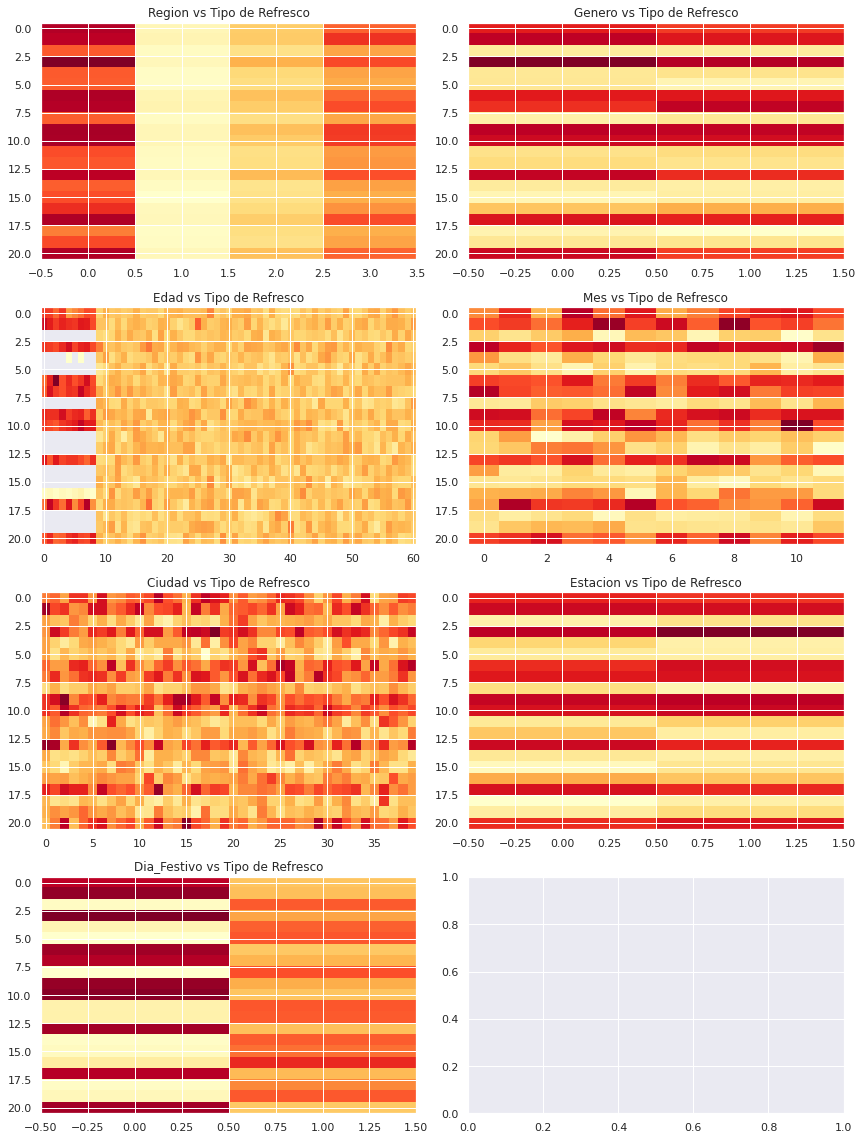

In [62]:
fig, axs = plt.subplots(nrows=4, ncols=2, figsize=(12, 16))

# Generar los heatmaps
heatmap_data = df.groupby(['Region', 'Tipo de Refresco']).size().reset_index(name='counts')
heatmap_data = heatmap_data.pivot(index='Tipo de Refresco', columns='Region', values='counts')
axs[0, 0].imshow(heatmap_data, cmap='YlOrRd', aspect='auto')
axs[0, 0].set_title('Region vs Tipo de Refresco')

heatmap_data = df.groupby(['Genero', 'Tipo de Refresco']).size().reset_index(name='counts')
heatmap_data = heatmap_data.pivot(index='Tipo de Refresco', columns='Genero', values='counts')
axs[0, 1].imshow(heatmap_data, cmap='YlOrRd', aspect='auto')
axs[0, 1].set_title('Genero vs Tipo de Refresco')

heatmap_data = df.groupby(['Edad', 'Tipo de Refresco']).size().reset_index(name='counts')
heatmap_data = heatmap_data.pivot(index='Tipo de Refresco', columns='Edad', values='counts')
axs[1, 0].imshow(heatmap_data, cmap='YlOrRd', aspect='auto')
axs[1, 0].set_title('Edad vs Tipo de Refresco')

heatmap_data = df.groupby(['Mes', 'Tipo de Refresco']).size().reset_index(name='counts')
heatmap_data = heatmap_data.pivot(index='Tipo de Refresco', columns='Mes', values='counts')
axs[1, 1].imshow(heatmap_data, cmap='YlOrRd', aspect='auto')
axs[1, 1].set_title('Mes vs Tipo de Refresco')

heatmap_data = df.groupby(['Ciudad', 'Tipo de Refresco']).size().reset_index(name='counts')
heatmap_data = heatmap_data.pivot(index='Tipo de Refresco', columns='Ciudad', values='counts')
axs[2, 0].imshow(heatmap_data, cmap='YlOrRd', aspect='auto')
axs[2, 0].set_title('Ciudad vs Tipo de Refresco')

heatmap_data = df.groupby(['Estacion', 'Tipo de Refresco']).size().reset_index(name='counts')
heatmap_data = heatmap_data.pivot(index='Tipo de Refresco', columns='Estacion', values='counts')
axs[2, 1].imshow(heatmap_data, cmap='YlOrRd', aspect='auto')
axs[2, 1].set_title('Estacion vs Tipo de Refresco')

heatmap_data = df.groupby(['Dia_Festivo', 'Tipo de Refresco']).size().reset_index(name='counts')
heatmap_data = heatmap_data.pivot(index='Tipo de Refresco', columns='Dia_Festivo', values='counts')
axs[3, 0].imshow(heatmap_data, cmap='YlOrRd', aspect='auto')
axs[3, 0].set_title('Dia_Festivo vs Tipo de Refresco')

# Ajustar los subplots y mostrar la figura
plt.tight_layout()
plt.show()

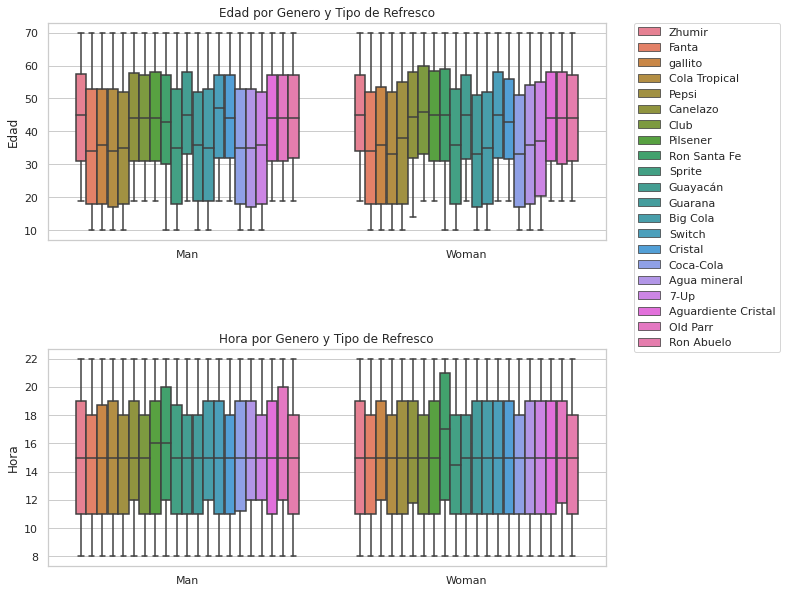

In [74]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style('whitegrid')
sns.set_palette('pastel')

fig, (ax1, ax2) = plt.subplots(nrows=2, figsize=(10, 10))

sns.boxplot(x='Genero', y='Edad', hue='Tipo de Refresco', data=df, palette='husl', ax=ax1)
ax1.set_title('Edad por Genero y Tipo de Refresco')
ax1.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
ax1.set_xlabel('')

sns.boxplot(x='Genero', y='Hora', hue='Tipo de Refresco', data=df, palette='husl', ax=ax2)
ax2.set_title('Hora por Genero y Tipo de Refresco')
ax2.legend_.remove()
ax2.set_xlabel('')

plt.subplots_adjust(hspace=0.5)
plt.show()


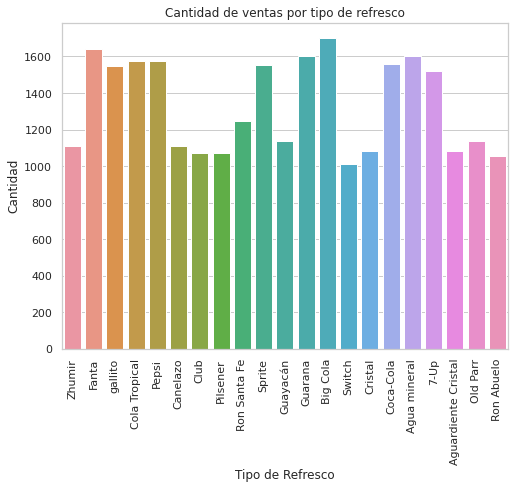

In [85]:
import seaborn as sns
import matplotlib.pyplot as plt


plt.figure(figsize=(8,6))
sns.countplot(x='Tipo de Refresco', data=df)
plt.xticks(rotation=90)
plt.xlabel('Tipo de Refresco')
plt.ylabel('Cantidad')
plt.title('Cantidad de ventas por tipo de refresco')
plt.show()


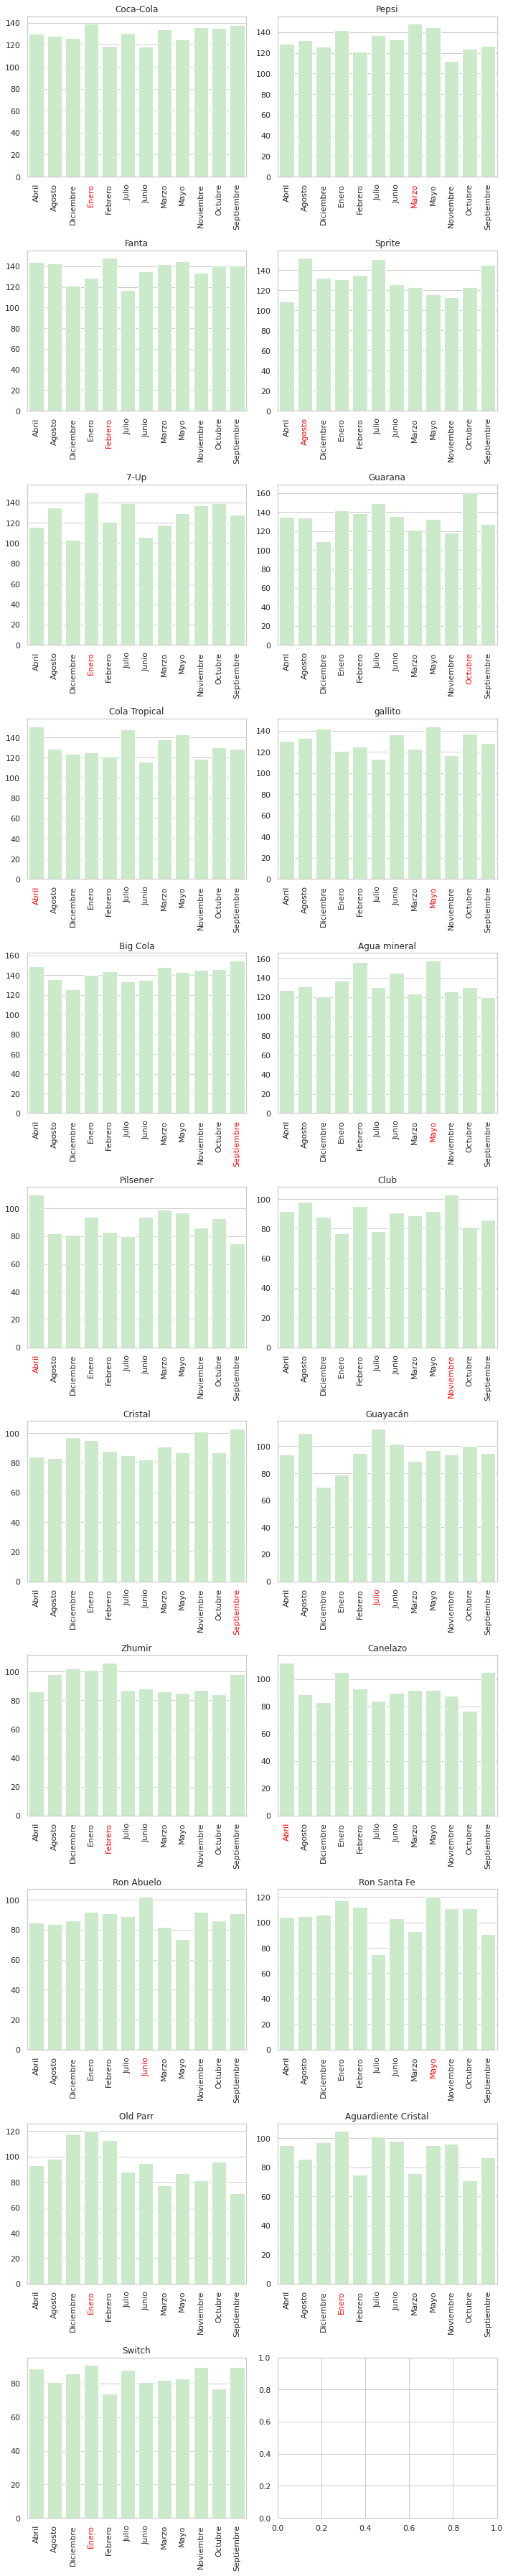

In [89]:
import seaborn as sns
import matplotlib.pyplot as plt

# Lista con los tipos de refresco
tipos_refresco = ['Coca-Cola', 'Pepsi', 'Fanta', 'Sprite', '7-Up', 'Guarana', 'Cola Tropical', 'gallito', 'Big Cola', 'Agua mineral', 'Pilsener', 'Club', 'Cristal', 'Guayacán', 'Zhumir', 'Canelazo', 'Ron Abuelo', 'Ron Santa Fe', 'Old Parr', 'Aguardiente Cristal', 'Switch']

# Crear subplots con 11 filas y 2 columnas
fig, axs = plt.subplots(nrows=11, ncols=2, figsize=(10, 50))

# Iterar por cada tipo de refresco y crear un gráfico de barras
for i, tipo in enumerate(tipos_refresco):
    # Filtrar los datos por tipo de refresco
    data_filtrada = df[df['Tipo de Refresco'] == tipo]
    
    # Contar el número de ocurrencias por mes
    ocurrencias = data_filtrada['Mes'].value_counts()
    
    # Ordenar los meses por orden cronológico
    ocurrencias = ocurrencias.sort_index()
    
    # Obtener el mes con mayor consumo
    mes_max_consumo = ocurrencias.idxmax()
    
    # Crear un gráfico de barras en el subplot correspondiente
    sns.barplot(ax=axs[i//2, i%2], x=ocurrencias.index, y=ocurrencias.values, color='#c6efc3')
    axs[i//2, i%2].set_title(tipo)
    
    # Rotar las etiquetas del eje x 90 grados
    axs[i//2, i%2].set_xticklabels(axs[i//2, i%2].get_xticklabels(), rotation=90)
    
    # Resaltar el mes con mayor consumo
    for tick in axs[i//2, i%2].xaxis.get_major_ticks():
        if tick.label.get_text() == mes_max_consumo:
            tick.label.set_color('red')
    
# Ajustar los márgenes y espacios entre subplots
fig.tight_layout()

# Mostrar el gráfico
plt.show()


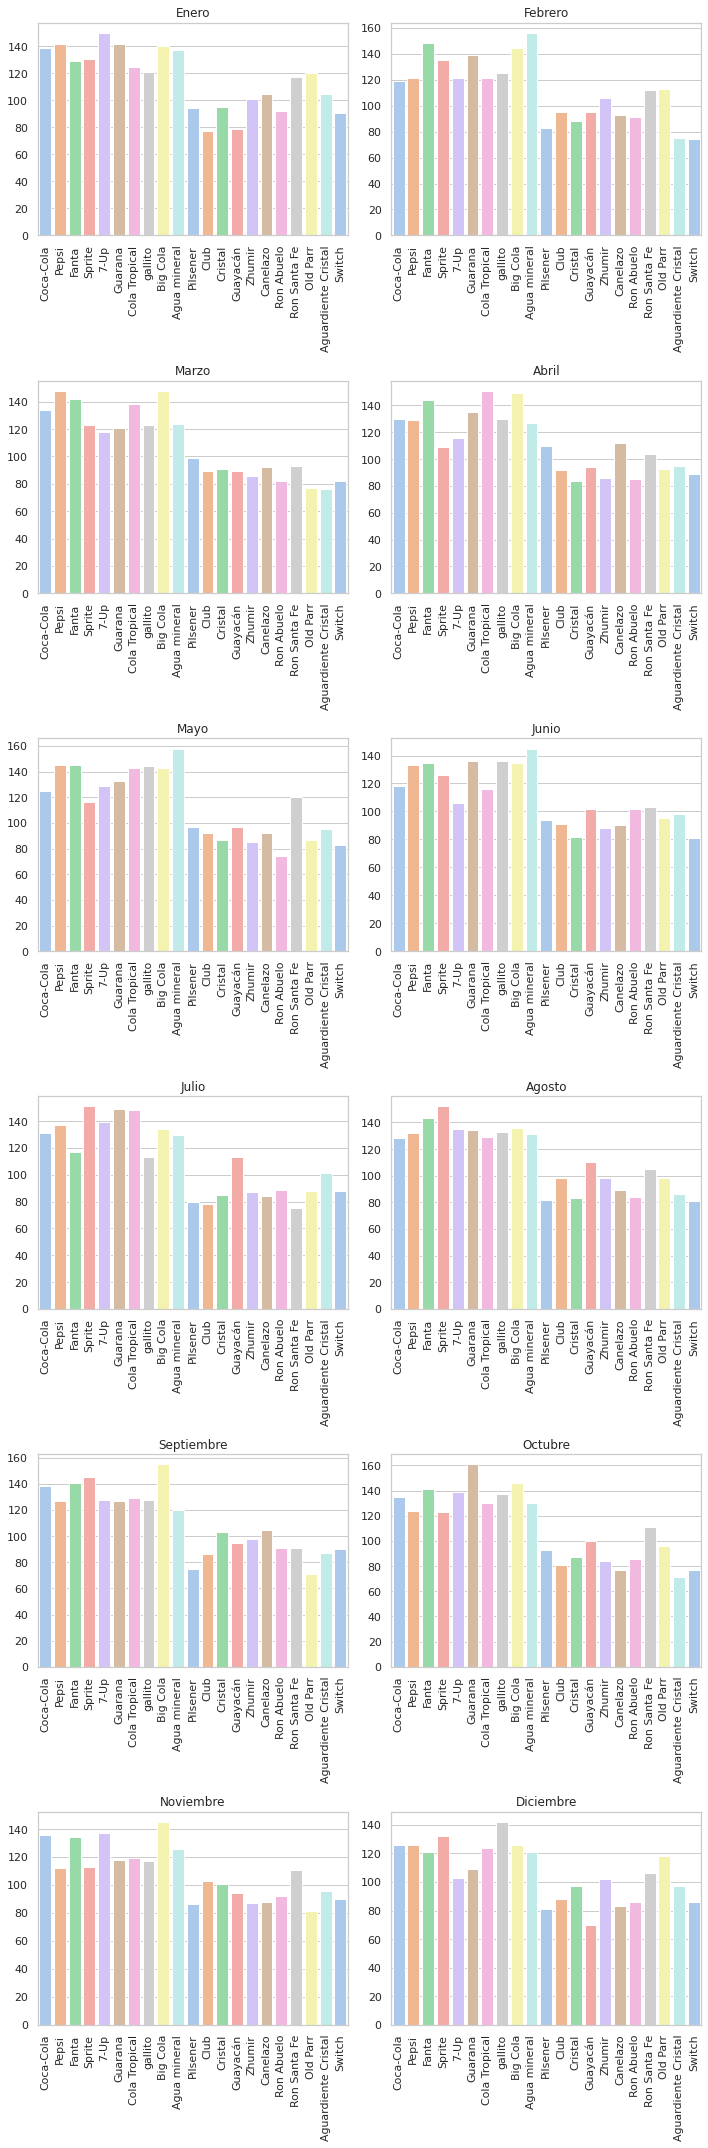

In [93]:
import seaborn as sns
import matplotlib.pyplot as plt

# Lista con los meses
meses = ['Enero', 'Febrero', 'Marzo', 'Abril', 'Mayo', 'Junio', 'Julio', 'Agosto', 'Septiembre', 'Octubre', 'Noviembre', 'Diciembre']

# Lista con los tipos de refresco
tipos_refresco = ['Coca-Cola', 'Pepsi', 'Fanta', 'Sprite', '7-Up', 'Guarana', 'Cola Tropical', 'gallito', 'Big Cola', 'Agua mineral', 'Pilsener', 'Club', 'Cristal', 'Guayacán', 'Zhumir', 'Canelazo', 'Ron Abuelo', 'Ron Santa Fe', 'Old Parr', 'Aguardiente Cristal', 'Switch']

# Crear subplots con 6 filas y 2 columnas
fig, axs = plt.subplots(nrows=6, ncols=2, figsize=(10, 30))

# Iterar por cada mes y crear un gráfico de barras con el número de ocurrencias para cada tipo de refresco
for i, mes in enumerate(meses):
    # Filtrar los datos por mes
    data_filtrada = df[df['Mes'] == mes]
    
    # Inicializar la lista de ocurrencias para cada tipo de refresco
    ocurrencias = [0] * len(tipos_refresco)
    
    # Contar el número de ocurrencias para cada tipo de refresco
    for j, tipo in enumerate(tipos_refresco):
        ocurrencias[j] = data_filtrada[data_filtrada['Tipo de Refresco'] == tipo].shape[0]
    
    # Crear un gráfico de barras en el subplot correspondiente
    sns.barplot(ax=axs[i//2, i%2], x=tipos_refresco, y=ocurrencias, palette='pastel')
    axs[i//2, i%2].set_title(mes)
    
    # Rotar las etiquetas del eje x 90 grados
    axs[i//2, i%2].set_xticklabels(axs[i//2, i%2].get_xticklabels(), rotation=90)
    
# Ajustar los márgenes y espacios entre subplots
fig.tight_layout()

# Mostrar el gráfico
plt.show()


In [96]:
# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Entrenar un modelo de clasificación utilizando RandomForestClassifier
model = RandomForestClassifier()
model.fit(X_train, y_train)

# Predecir los tipos de refresco en el conjunto de prueba
y_pred = model.predict(X_test)

# Evaluar la precisión del modelo utilizando accuracy_score
accuracy = accuracy_score(y_test, y_pred)
print("Precisión del modelo: {:.2f}%".format(accuracy*100))

# Guardar el modelo entrenado
with open('/content/drive/MyDrive/modelo.pkl', 'wb') as archivo:
    pickle.dump(model, archivo)
# Guardar el objeto LabelEncoder
with open("le_genero.pkl", "wb") as f:
    pickle.dump(le_genero, f)
with open("le_rasgos.pkl", "wb") as f:
    pickle.dump(le_rasgos, f)
with open("le_mes.pkl", "wb") as f:
    pickle.dump(le_mes, f)
with open("le_ciudad.pkl", "wb") as f:
    pickle.dump(le_ciudad, f)
with open("le_estacion.pkl", "wb") as f:
    pickle.dump(le_estacion, f)
with open("le_dia_festivo.pkl", "wb") as f:
    pickle.dump(le_dia_festivo, f)
with open("le_region.pkl", "wb") as f:
    pickle.dump(le_region, f)

Precisión del modelo: 6.61%


In [29]:
import pickle

# Crear una lista con los objetos LabelEncoder
le_list = [le_genero,
           le_rasgos, 
           le_mes, 
           le_ciudad, 
           le_estacion,
           le_dia_festivo, 
           le_region, 
           le_refresco]

# Guardar la lista en un archivo
with open("label_encoders.pkl", "wb") as f:
    pickle.dump(le_list, f)

In [30]:
import pickle
# Cargar la lista de objetos LabelEncoder desde el archivo
with open("label_encoders.pkl", "rb") as f:
    le_list = pickle.load(f)

#Cargar datos  para  predecir

In [31]:
dfT = {'Genero':'Man','Hora': 12,'Edad': 20, 'Rasgos':'black', 'Mes':'Enero', 'Ciudad':'Cuenca', 'Estacion':'Invierno', 'Dia_Festivo':'False', 'Region':'Costa'}
dfn = pd.DataFrame(dfT, index=[0])

In [17]:
dfn.columns



Index(['Genero', 'Hora', 'Edad', 'Rasgos', 'Mes', 'Ciudad', 'Estacion',
       'Dia_Festivo', 'Region'],
      dtype='object')

In [32]:
dfn["Genero"] = le_list[0].transform([dfn["Genero"]])[0]
dfn["Rasgos"] = le_list[1].transform([dfn["Rasgos"]])[0]
dfn["Mes"] = le_list[2].transform([dfn["Mes"]])[0]
dfn["Ciudad"] = le_list[3].transform([dfn["Ciudad"]])[0]
dfn["Estacion"] = le_list[4].transform([dfn["Estacion"]])[0]
dfn["Dia_Festivo"] = le_list[5].transform([eval(dfn["Dia_Festivo"][0])])[0]
dfn["Region"] = le_list[6].transform([dfn["Region"]])[0]

/usr/local/lib/python3.8/dist-packages/sklearn/preprocessing/_label.py:133: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [33]:
prediccion = model.predict(dfn)

/usr/local/lib/python3.8/dist-packages/sklearn/base.py:493: FutureWarning: The feature names should match those that were passed during fit. Starting version 1.2, an error will be raised.
Feature names must be in the same order as they were in fit.

  warnings.warn(message, FutureWarning)


In [9]:
val = le_refresco.inverse_transform([prediccion[0]])
print(val)

['Coca-Cola']


#Redes neuranales 

In [ ]:
# Configurar TensorFlow para utilizar GPU
config = tf.compat.v1.ConfigProto()
config.gpu_options.allow_growth = True
session = tf.compat.v1.Session(config=config)

In [ ]:
import joblib
from sklearn.neural_network import MLPRegressor
# Crear el modelo MLPRegressor
mlp = MLPRegressor(random_state=42)
param_grid = {
    'hidden_layer_sizes': [(100,50), (50,), (100,)],
    'activation': ['relu', 'tanh'],
    'solver': ['sgd', 'adam'],
    'learning_rate': ['constant', 'adaptive']
}
# Realizar la búsqueda de hiperparámetros mediante GridSearchCV
grid_search = GridSearchCV(mlp, param_grid, cv=5, n_jobs=-1,scoring='roc_auc', verbose=10)
with tf.device('/device:GPU:0'):
    grid_search.fit(X_train, y_train)
#grid_search.fit(X_train, y_train)
print("Mejores hiperparámetros: ", grid_search.best_params_)
print("Precisión en el conjunto de prueba: ", grid_search.score(X_test, y_test))
# Guardar el mejor modelo encontrado
best_model = grid_search.best_estimator_
joblib.dump(best_model, 'mejor_modeloMLPregressor.pkl')

In [ ]:

# Crear el modelo MLPClassifier
mlp = MLPClassifier(random_state=42)
param_grid = {
    'hidden_layer_sizes': [(20,5), (20,10), (300,50)],
    'activation': ['relu', 'tanh'],
    'solver': ['sgd', 'adam'],
    'learning_rate': ['constant', 'adaptive'],
    'alpha': [0.000001, 0.001, 0.01]
}

# Realizar la búsqueda de hiperparámetros mediante GridSearchCV
grid_search = GridSearchCV(mlp, param_grid, cv=5, n_jobs=-1)
with tf.device('/device:GPU:0'):
    grid_search.fit(X_train, y_train)


# Imprimir los mejores hiperparámetros y la precisión en el conjunto de prueba
print("Mejores hiperparámetros: ", grid_search.best_params_)
print("Precisión en el conjunto de prueba: ", grid_search.score(X_test, y_test))

# Guardar el mejor modelo encontrado
best_model = grid_search.best_estimator_
joblib.dump(best_model, 'mejor_modeloMLPC.pkl')


Mejores hiperparámetros:  {'activation': 'relu', 'alpha': 0.01, 'hidden_layer_sizes': (20, 10), 'learning_rate': 'constant', 'solver': 'adam'}
Precisión en el conjunto de prueba:  0.05


/usr/local/lib/python3.8/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


['mejor_modeloMLPC.pkl']

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error

# Definir el modelo de regresión lineal
linear_reg = LinearRegression()

# Definir la rejilla de hiperparámetros
param_grid = {
    'fit_intercept': [True, False],
    'normalize': [True, False]
}

# Realizar la búsqueda de hiperparámetros mediante GridSearchCV
grid_search = GridSearchCV(linear_reg, param_grid, cv=5, n_jobs=-1)
with tf.device('/device:GPU:0'):
    grid_search.fit(X_train, y_train)

# Imprimir los mejores hiperparámetros y la precisión en el conjunto de prueba
print("Mejores hiperparámetros: ", grid_search.best_params_)
y_pred = grid_search.predict(X_test)
print("Error cuadrático medio en el conjunto de prueba: ", mean_squared_error(y_test, y_pred))
# Guardar el mejor modelo encontrado
best_model = grid_search.best_estimator_
joblib.dump(best_model, 'mejor_modeloLinR.pkl')

Mejores hiperparámetros:  {'fit_intercept': True, 'normalize': True}
Error cuadrático medio en el conjunto de prueba:  36.32555303322998


/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_base.py:141: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), LinearRegression())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)


  warnings.warn(


['mejor_modeloLinR.pkl']

In [ ]:

from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVR

# Definir los parámetros a ajustar mediante GridSearchCV
param_grid = {
    'C': [0.1, 1, 10, 100],
    'kernel': ['linear', 'rbf', 'poly'],
    'degree': [2, 3, 4],
    'gamma': ['scale', 'auto']
}

# Crear un objeto de regresión SVM
svm_reg = SVR()

# Crear un objeto GridSearchCV para buscar los mejores parámetros
grid_search = GridSearchCV(svm_reg, param_grid, cv=5, n_jobs=-1)

# Entrenar el modelo con el conjunto de entrenamiento
with tf.device('/device:GPU:0'):
    grid_search.fit(X_train, y_train)


# Imprimir los mejores parámetros y la precisión en el conjunto de prueba
print("Mejores hiperparámetros: ", grid_search.best_params_)
print("Precisión en el conjunto de prueba: ", grid_search.score(X, y))
best_model = grid_search.best_estimator_
joblib.dump(best_model, 'mejor_modeloLinSVR.pkl')

Mejores hiperparámetros:  {'C': 0.1, 'degree': 2, 'gamma': 'scale', 'kernel': 'rbf'}
Precisión en el conjunto de prueba:  -0.004487791344718328


/usr/local/lib/python3.8/dist-packages/sklearn/base.py:443: UserWarning: X has feature names, but SVR was fitted without feature names
  warnings.warn(


['mejor_modeloLinSVR.pkl']